# 1. Problem Domain and Data Preparation

<strong> Description of Problem Domain</strong>

The problem domain revolves around understanding the factors influencing student performance in academic settings. In today’s educational landscape, identifying these factors is crucial for educators, policymakers, and institutions aiming to enhance student outcomes. By analyzing various aspects such as socioeconomic background, parental involvement, and academic engagement, stakeholders can implement targeted interventions to support student success.

<strong> Motivation </strong>

The motivation behind this analysis stems from the need to improve educational outcomes and address disparities among students. With increasing emphasis on personalized learning and support systems, uncovering the relationships between different factors and student performance can lead to more effective strategies for fostering academic achievement. Additionally, understanding these can help in developing policies that create equitable learning environments.

<strong> Data Set Chosen </strong>

The Kaggle Student Performance Factors dataset was selected for this analysis due to its comprehensive collection of relevant variables. It includes demographic information, academic records, and social factors, making it suitable for exploring the multifaceted nature of student performance. The dataset's accessibility and community support on Kaggle further enhance its utility for analysis and model development.

<strong>Challenge Faced During This Assignment</strong>

- Data Quality and Preprocessing: The dataset contained missing values and categorical features, necessitating thorough cleaning and preprocessing to ensure the accuracy of analyses.

In [1]:
# import required libaries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, QuantileTransformer

In [2]:
# load and display data
df = pd.read_csv('data/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<strong>Column description</strong>

| Attribute                      | Description                                                       |
|--------------------------------|-------------------------------------------------------------------|
| Hours_Studied                  | Total number of hours dedicated to studying each week.          |
| Attendance                     | Proportion of classes attended by the student.                   |
| Parental_Involvement           | Degree of parental engagement in the student’s education (Low, Medium, High). |
| Access_to_Resources            | Availability of learning materials and resources (Low, Medium, High). |
| Extracurricular_Activities     | Involvement in after-school activities (Yes, No).                |
| Sleep_Hours                    | Average hours of sleep the student gets per night.               |
| Previous_Scores                | Scores achieved in prior examinations.                            |
| Motivation_Level               | Degree of motivation exhibited by the student (Low, Medium, High). |
| Internet_Access                | Availability of internet connection (Yes, No).                   |
| Tutoring_Sessions              | Count of tutoring sessions participated in each month.           |
| Family_Income                  | Economic status of the family (Low, Medium, High).               |
| Teacher_Quality                | Assessment of teacher effectiveness (Low, Medium, High).         |
| School_Type                    | Classification of the school (Public, Private).                  |
| Peer_Influence                 | Impact of friends on academic performance (Positive, Neutral, Negative). |
| Physical_Activity              | Average number of hours spent on physical activities weekly.      |
| Learning_Disabilities           | Existence of learning disabilities (Yes, No).                    |
| Parental_Education_Level       | Highest educational attainment of the parents (High School, College, Postgraduate). |
| Distance_from_Home             | Proximity of home to the school (Near, Moderate, Far).          |
| Gender                         | The student's gender (Male, Female).                             |
| Exam_Score                     | Final score achieved in the exam.                               |


### Data Cleaning
The missing rows are few compared to the overall data size, so it make sense to drop rows with missing data.

In [3]:
# check for missing values
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
# drop rows with missing data and check for missing values again.
df.dropna(inplace=True, axis=0)
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

# 2. Exploratory Data Analysis
<strong>NB:</strong> the full analysis can be found in the performance analysis PDF

##### a. Analysis on the effect of sleep, previous scores, attendance and hours of study of student.

<strong>How Does The Average Sleep_Hours Affects?</strong>

Average Exam-Scores?
The analysis, reveal a very weak negative linear
correlation between sleep hours and exam
scores. This suggests that the amount of sleep
has no significant effect on exam performance .

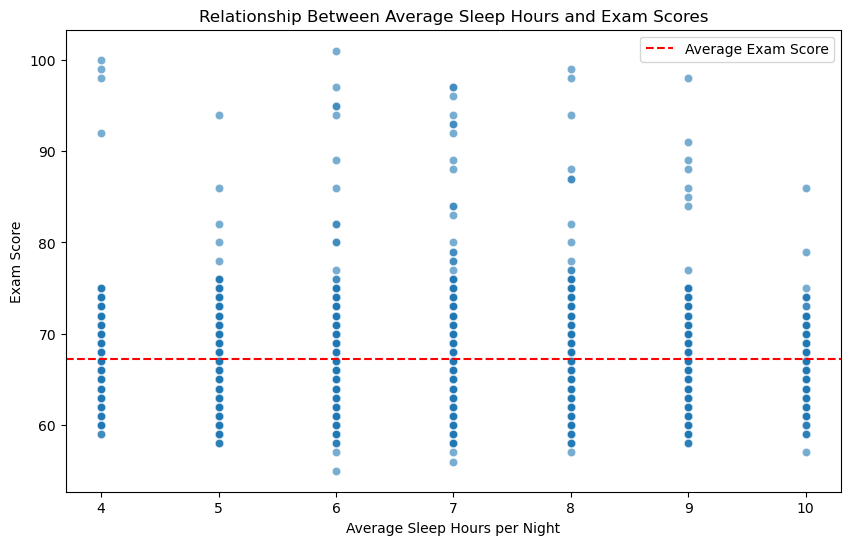

Correlation between Sleep Hours and Exam Scores: -0.02


In [5]:
# plot the relationship between average sleep hours and exam scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sleep_Hours', y='Exam_Score', alpha=0.6)
plt.title('Relationship Between Average Sleep Hours and Exam Scores')
plt.xlabel('Average Sleep Hours per Night')
plt.ylabel('Exam Score')
plt.axhline(df['Exam_Score'].mean(), color='r', linestyle='--', label='Average Exam Score')
plt.legend()
plt.show()

# Calculate the correlation coefficient
correlation = df['Sleep_Hours'].corr(df['Exam_Score'])
print(f'Correlation between Sleep Hours and Exam Scores: {correlation:.2f}')

<strong>How Does The Average Attendance Affects
Average Exam-Scores?</strong>

There is a moderate positive correlation of 0.58
between attendance and exam scores. This
indicates that as attendance increases, exam
scores tend to improve implying a direct
relationship between consistent attendance and
better academic performance increase as well.

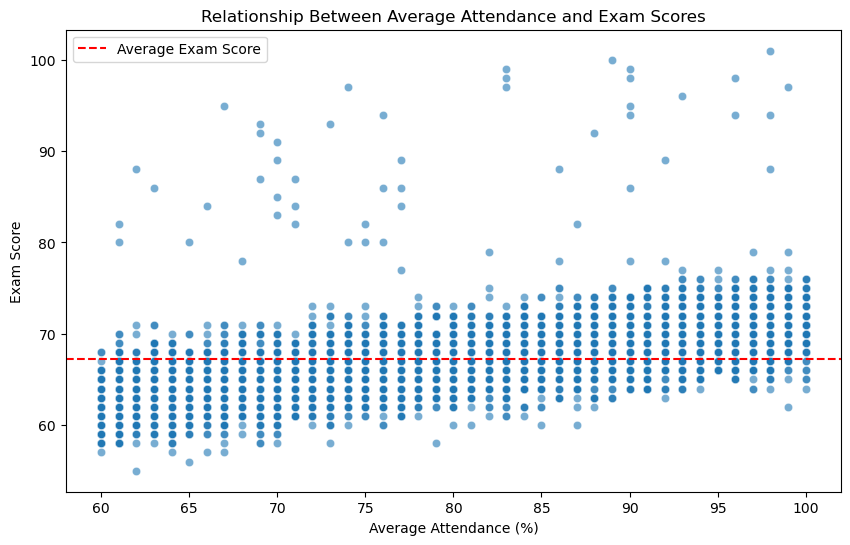

Correlation between Attendance and Exam Scores: 0.58


In [6]:
# plot the relationship between average attendance and exam scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Attendance', y='Exam_Score', alpha=0.6)
plt.title('Relationship Between Average Attendance and Exam Scores')
plt.xlabel('Average Attendance (%)')
plt.ylabel('Exam Score')
plt.axhline(df['Exam_Score'].mean(), color='r', linestyle='--', label='Average Exam Score')
plt.legend()
plt.show()

# Calculate the correlation coefficient
correlation = df['Attendance'].corr(df['Exam_Score'])
print(f'Correlation between Attendance and Exam Scores: {correlation:.2f}')

<strong>How Does The Previous Scores Affects ExamScores?</strong>

The analysis shows a weak positive correlation
0.18 between the previous and current exam
score. Thus This suggests that while previous
scores may have some influence, they only
slightly affect students current exam
performance

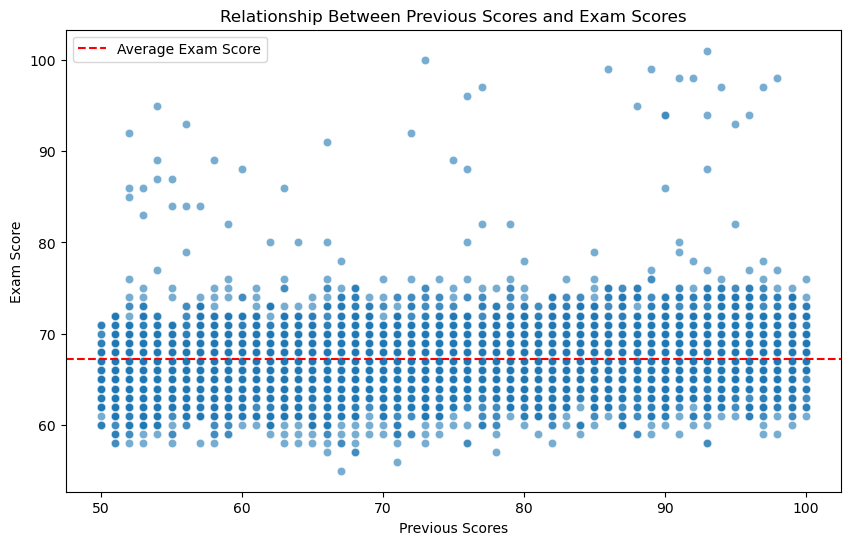

Correlation between Previous Scores and Exam Scores: 0.17


In [7]:
# plot the relationship between previous scores and exam scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Previous_Scores', y='Exam_Score', alpha=0.6)
plt.title('Relationship Between Previous Scores and Exam Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')
plt.axhline(df['Exam_Score'].mean(), color='r', linestyle='--', label='Average Exam Score')
plt.legend()
plt.show()

# Calculate the correlation coefficient
correlation = df['Previous_Scores'].corr(df['Exam_Score'])
print(f'Correlation between Previous Scores and Exam Scores: {correlation:.2f}')

<strong>How Does The Average Study_Hours Affects</strong>

Average Exam-Scores?
The analysis indicate a moderate positive linear
correlation of 0.45 between study hours and
exam scores. This implies as study hours and
exam scores. This implies that as the study hours
increases, exam scores tend to improve
highlighting the importance of dedicated study

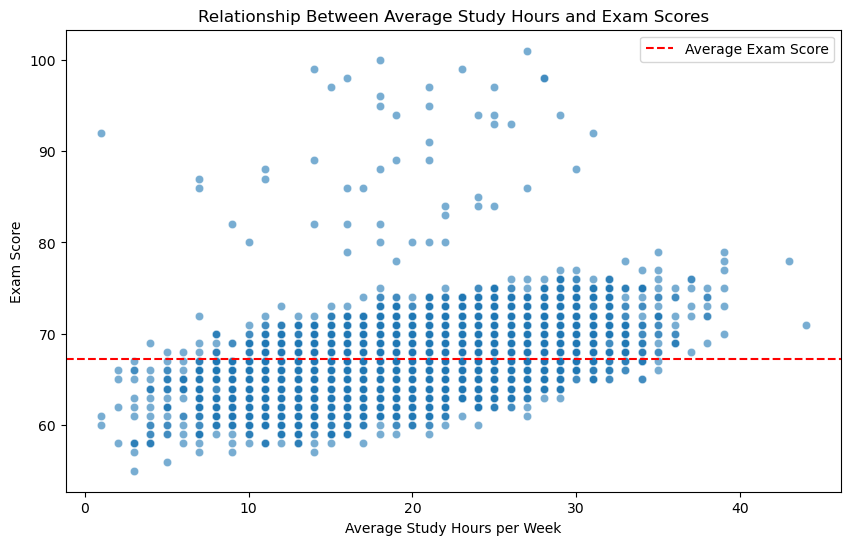

Correlation between Study Hours and Exam Scores: 0.45


In [8]:
# plot the relationship betwen average study hours and exam scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score', alpha=0.6)
plt.title('Relationship Between Average Study Hours and Exam Scores')
plt.xlabel('Average Study Hours per Week')
plt.ylabel('Exam Score')
plt.axhline(df['Exam_Score'].mean(), color='r', linestyle='--', label='Average Exam Score')
plt.legend()
plt.show()

# Calculate the correlation coefficient
correlation = df['Hours_Studied'].corr(df['Exam_Score'])
print(f'Correlation between Study Hours and Exam Scores: {correlation:.2f}')

# 3. Data Transformation

Encoding categorical features

In [9]:
# extract columns with the object data type
categorical_column = df.select_dtypes(include=['object']).columns

# convert the object columns to integers 
le = LabelEncoder()
for column in categorical_column:
    df[column] = le.fit_transform(df[column]).astype('int64')

PCA

This reduce the dimensionality of the data while retaining most of the information or patterns present in the data.
 
The first step is to standardise out data, ensuring a mean of 0 and std of 1

In [10]:
# data scalling
for col in df.columns[:-1]:
    transformer = QuantileTransformer(random_state=0, output_distribution="normal")
    vec_len = len(df[col].values)
    raw_vec = df[col].values.reshape(vec_len, 1)
    transformer.fit(raw_vec)

    df[col] = transformer.transform(raw_vec).reshape(1, vec_len)[0]

In [11]:
# create the x and y data
y = df[['Exam_Score']]
X = df.drop(['Exam_Score'], axis=1)
y.shape, X.shape

((6378, 1), (6378, 19))

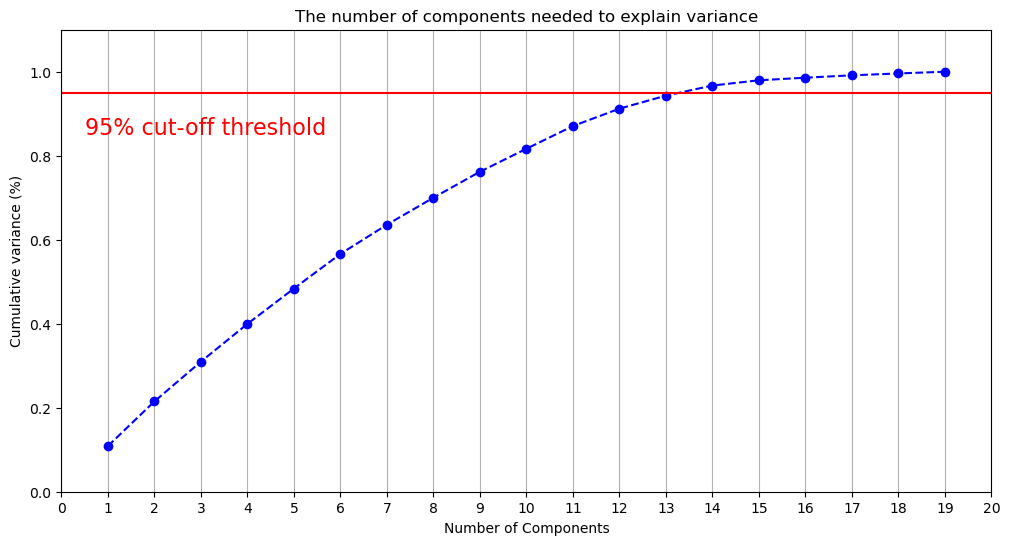

In [12]:
# this diagram display how to best select the number of components when using PCA
pca = PCA().fit(X)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 20, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 21, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

<strong>Number of Components to Reach 95% Variance:</strong>The plot shows that about 14 components are needed to explain 95% of the variance. This means that, instead of using all original features, reducing the dataset to 14 principal components will still capture 95% of the information, simplifying the dataset while retaining its most important characteristics.